# 1. 業務理解 (Business Understanding)

目標是預測乘客是否能在泰坦尼克號災難中存活。這是一個二元分類問題。

# 2. 數據理解 (Data Understanding)


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 載入數據
df_train = pd.read_csv('./titanic/train.csv')
df_test = pd.read_csv('./titanic/test.csv')

# 查看數據基本信息
print(df_train.info())
print("\n基本統計信息：")
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

基本統計信息：
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842  

# 3. 數據準備 (Data Preparation)


In [2]:
# 數據清理和特徵工程
def prepare_data(df):
    # 處理缺失值
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    
    # 特徵工程
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # 轉換分類變量
    df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    
    # 選擇特徵
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    X = df[features]
    y = df['Survived']
    
    return X, y

X, y = prepare_data(df_train)

# 4. 建模 (Modeling)

In [3]:
# 分割數據
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 訓練模型
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

# 5. 評估 (Evaluation)


In [4]:
# 模型評估
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 預測
y_pred = model.predict(X_val_scaled)

# 打印評估報告
print("模型評估報告：")
print(classification_report(y_val, y_pred))

# 特徵重要性
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(model.coef_[0])
})
print("\n特徵重要性：")
print(feature_importance.sort_values('importance', ascending=False))

模型評估報告：
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       104
           1       0.80      0.71      0.75        75

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


特徵重要性：
    feature  importance
1       Sex    1.297397
0    Pclass    0.929019
2       Age    0.518934
3     SibSp    0.307817
5      Fare    0.143301
6  Embarked    0.122894
4     Parch    0.113132


In [5]:
print("Accuracy:")
print(accuracy_score(y_val, y_pred))

Accuracy:
0.8044692737430168


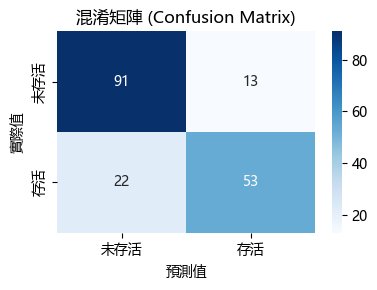

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 計算 confusion matrix
cm = confusion_matrix(y_val, y_pred)

# 設置中文字體（如果需要顯示中文）
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 創建圖形
plt.figure(figsize=(4, 3))

# 使用 seaborn 繪製熱力圖
sns.heatmap(cm, 
            annot=True,  # 顯示數值
            fmt='d',     # 數值格式為整數
            cmap='Blues',  # 使用藍色色系
            xticklabels=['未存活', '存活'],
            yticklabels=['未存活', '存活'])

# 添加標籤
plt.title('混淆矩陣 (Confusion Matrix)')
plt.xlabel('預測值')
plt.ylabel('實際值')

# 調整布局
plt.tight_layout()

# 顯示圖形
plt.show()

# 6. 部署 (Deployment)


In [9]:
def prepare_test_data(df):
    # 處理缺失值
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    
    # 特徵工程
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # 轉換分類變量
    df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    
    # 選擇特徵
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    X = df[features]
    
    return X

In [21]:
# 使用之前訓練好的模型對測試集進行預測
def prepare_submission(df_test, model, scaler):
    # 複製測試數據
    df_test_processed = df_test.copy()
    
    # 處理缺失值
    numeric_columns = df_test_processed.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        df_test_processed[col].fillna(df_test_processed[col].median(), inplace=True)

    X_test = prepare_test_data(df_test_processed)
    
    # 標準化特徵
    X_test_scaled = scaler.transform(X_test)
    
    # 進行預測
    predictions = model.predict(X_test_scaled)
    
    # 創建提交檔案
    submission = pd.DataFrame({
        'PassengerId': df_test['PassengerId'],
        'Survived': predictions
    })
    
    # 保存為 CSV 檔案
    submission.to_csv('submission.csv', index=False)
    
    print("預測檔案已生成！")
    print("\n預覽前五筆資料：")
    print(submission.head())
    
    return submission


# 生成提交檔案
submission = prepare_submission(df_test, model, scaler)

預測檔案已生成！

預覽前五筆資料：
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
